This is going to have my t-SNE scatter plot for the data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from PIL import Image
import os
import numpy as np
import glob
import pandas as pd
import seaborn as sns
import umap

In [3]:
path="Resources/stimuli/"
Xlist=[]
Ylist=[]

In [ ]:
for filepath in glob.iglob('Resources/stimuli/*/*.JPG'):
    print(filepath)

In [ ]:
bean = "Resources/stimuli/09/09F_Ne_to_Sa_C07.JPG"
split_bean=bean.split('/')[-1]
print(split_bean.split('.')[0])

In [4]:
for filepath in glob.iglob('Resources/stimuli/*/*.JPG'):
    img= Image.open(filepath)
    featurevector=np.array(img).flatten()
    Xlist.append(featurevector)
    file_name = filepath.split('/')[-1]
    Ylist.append(file_name.split('.')[0])
    
    
print(Xlist[0])

[255 255 255 ... 225 225 223]


In [ ]:
Xlist[0].shape

In [ ]:
len(Xlist)

In [5]:
images_dataframe = pd.DataFrame(Xlist)


In [6]:
reducer = umap.UMAP(random_state=42)
reducer.fit(images_dataframe)

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, random_state=42,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=False)

In [7]:
embedding = reducer.transform(images_dataframe)

In [8]:
embedding.shape

(240, 2)

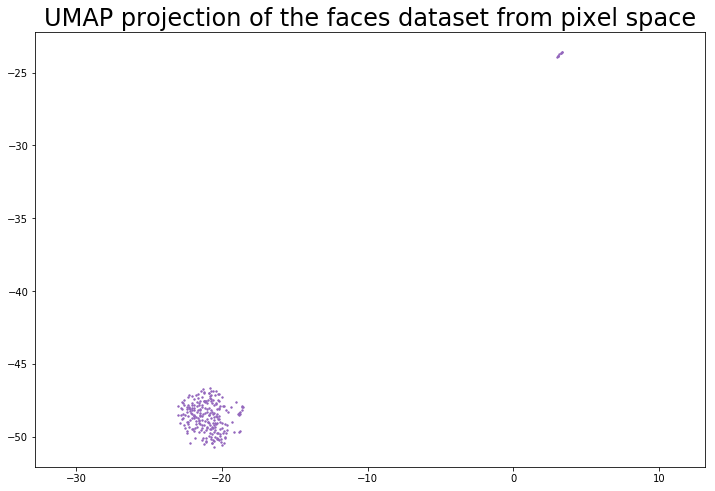

In [11]:
fig = plt.figure(figsize=(12, 8))


plt.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[4]], cmap='Spectral', s=2)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the faces dataset from pixel space', fontsize=24);

plt.savefig('umap_pixel_2.png', dpi=300)

Trying to get compressed images:

In [ ]:
path="Resources/stimuli/"
Xslist=[]
Yslist=[]

In [ ]:
for filepath in glob.iglob('Resources/stimuli/*/*.JPG'):
    img= Image.open(filepath)
    img = img.resize((100,100), Image.ANTIALIAS)
    featurevector=np.array(img).flatten()
    Xslist.append(featurevector)
    file_name = filepath.split('/')[-1]
    Yslist.append(file_name.split('.')[0])
    
    
print(Xslist[0])

In [ ]:
Xslist[0].size

In [ ]:
small_images_dataframe = pd.DataFrame(Xslist)

In [ ]:
#sns.pairplot(small_images_dataframe, hue='digit', palette='Spectral')

This wouldn't make sense to plot. Also it's taking too long to plot out `¯\_(ツ)_/¯`